In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
file_path = "/content/Total.csv"  # Update with correct file path
data = pd.read_csv(file_path)

# Display basic info
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113639 entries, 0 to 113638
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      113639 non-null  object 
 1   JobTitle          113639 non-null  object 
 2   BasePay           113639 non-null  object 
 3   OvertimePay       113639 non-null  float64
 4   OtherPay          113638 non-null  float64
 5   Benefits          113638 non-null  object 
 6   TotalPay          113638 non-null  float64
 7   TotalPayBenefits  113638 non-null  float64
 8   Year              113638 non-null  float64
dtypes: float64(5), object(4)
memory usage: 7.8+ MB
None
        EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CH

<ipython-input-1-b6daf5047b73>:11: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 OtherPay            1
Benefits            1
TotalPay            1
TotalPayBenefits    1
Year                1
dtype: int64


In [ ]:
# Fill numerical missing values with median
num_cols = data.select_dtypes(include=['number']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Fill categorical missing values with mode
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])


In [ ]:
if 'Year' in data.columns:
    data['Year'] = data['Year'].astype(int)


In [ ]:
print(data.describe())


         OvertimePay       OtherPay       TotalPay  TotalPayBenefits  \
count  113639.000000  113639.000000  113639.000000     113639.000000   
mean     5404.259101    3945.053128   77440.864871      95202.004066   
std     12280.752559    8580.765166   52562.292190      64797.917956   
min        -0.010000   -7058.590000       0.000000        -33.890000   
25%         0.000000       0.000000   38950.995000      46169.335000   
50%         0.000000     893.405000   72502.560000      91598.370000   
75%      4865.465000    4604.595000  109391.450000     133853.145000   
max    245131.880000  400184.250000  567595.430000     567595.430000   

                Year  
count  113639.000000  
mean     2012.067415  
std         0.868299  
min      2011.000000  
25%      2011.000000  
50%      2012.000000  
75%      2013.000000  
max      2014.000000  


<ipython-input-7-3248e1d5f18e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')


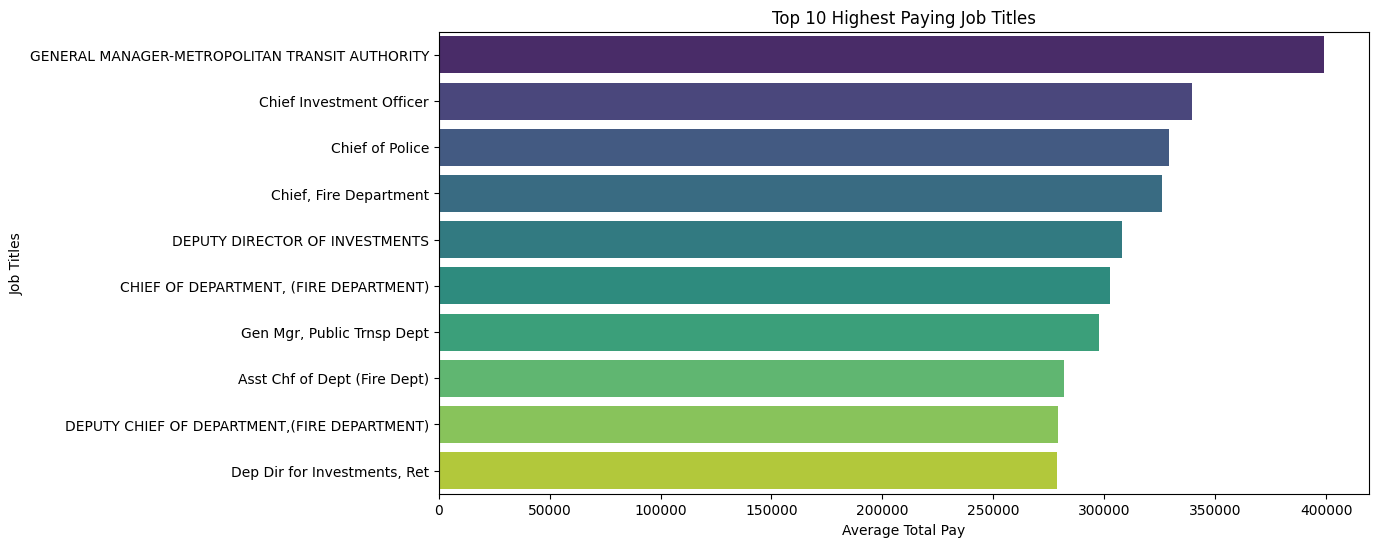

In [ ]:
top_10_jobs = data.groupby('JobTitle')['TotalPay'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')
plt.title("Top 10 Highest Paying Job Titles")
plt.xlabel("Average Total Pay")
plt.ylabel("Job Titles")
plt.show()


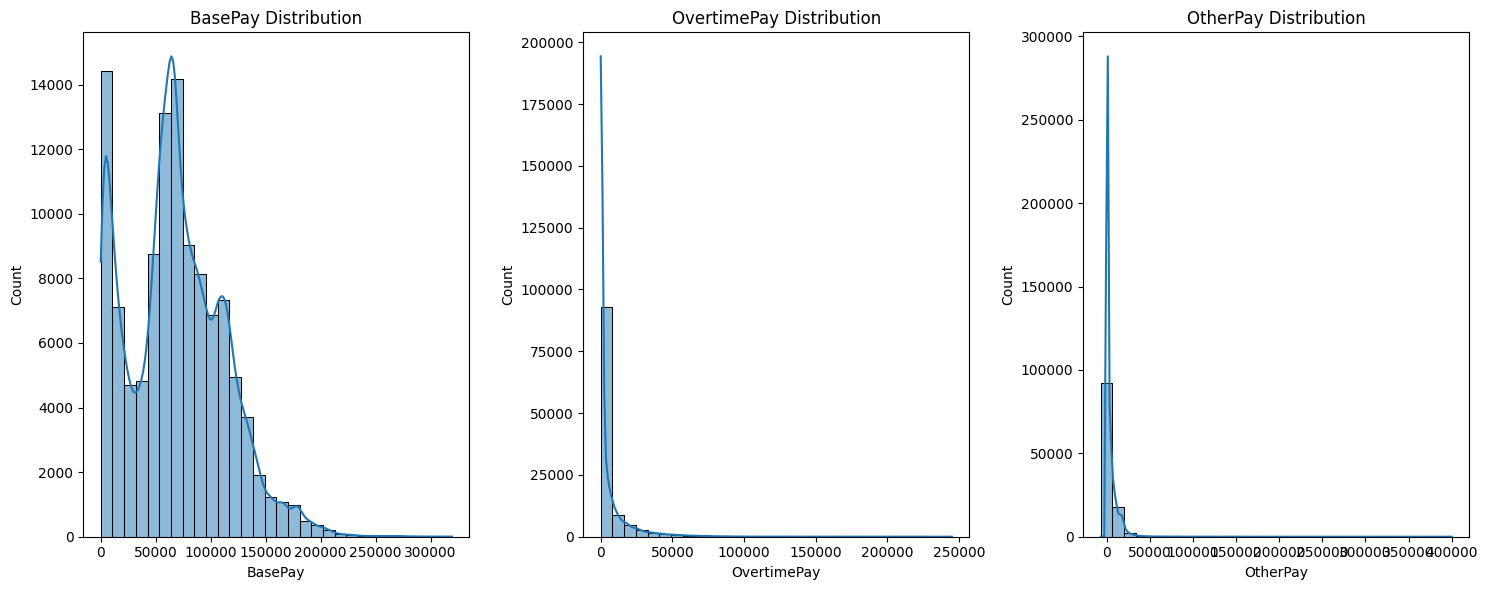

In [ ]:
data.replace("Not Provided", np.nan, inplace=True)
num_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay']
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

plt.figure(figsize=(15, 6))

for i, col in enumerate(['BasePay', 'OvertimePay', 'OtherPay']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()


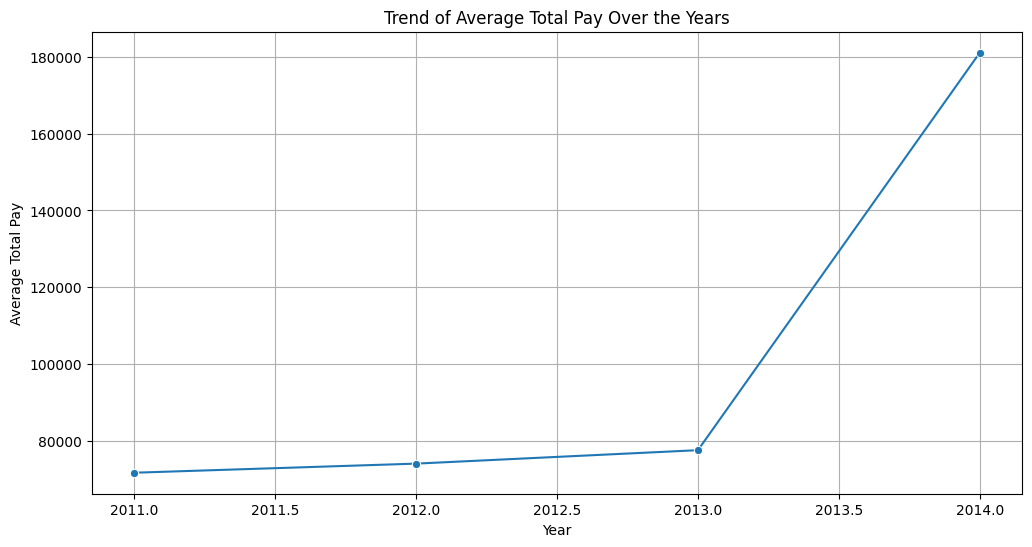

In [ ]:
if 'Year' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data.groupby('Year')['TotalPay'].mean(), marker='o')
    plt.title("Trend of Average Total Pay Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Average Total Pay")
    plt.grid()
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
data['JobTitle'] = encoder.fit_transform(data['JobTitle'])

# Select Features and Target
features = ['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
target = 'TotalPay'

# Fill missing values in case any remain
data.fillna(0, inplace=True)


In [ ]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 215.11727772753756
MSE: 2350507.506286901
R² Score: 0.9991689327590324


In [1]:
!git push origin main


fatal: not a git repository (or any of the parent directories): .git
